# GUC NETW 1003 Kmeans Assginmnet 2

##### Mohamed Abdelwahab
##### 43-18031

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [1]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
np.random.seed(1)

> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [2]:
def GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type ):
## write code here for the Distance function here # 
    d=np.zeros(shape=(Cluster_Centroids.shape[0],Data_points.shape[0]))
    p= np.zeros(shape=(Data_points.shape[0],Data_points.shape[1]))
    if Distance_Type !="Ecluidian":
        A = Data_points-np.mean(Data_points,axis=1, keepdims=True)
        B = Cluster_Centroids - np.mean(Cluster_Centroids,axis=1, keepdims=True)
        C = np.square(A)
        D = np.square(B)
        ones = np.ones((Data_points.shape))
        p =  1- np.divide(np.dot(A,B.T)+10**(-11), np.sqrt(np.dot(C,D.T))+10**(-11))
        return p
    else:
        for i in range(Cluster_Centroids.shape[0]):
            Centroid=Cluster_Centroids[i].reshape(1,Cluster_Centroids[i].shape[0])       
            d[i]=np.sqrt(np.sum(np.square(Data_points-Centroid),axis=1))
    #         else: # Pearson distance coefficient
    #             A = Data_points-np.mean(Data_points,axis=1, keepdims=True)
    #             B = Cluster_Centroids - np.mean(Cluster_Centroids,axis=1, keepdims=True)
    #             C = np.square(A)
    #             D = np.square(B)
    #             ones = np.ones((Data_points.shape))
    #             print(ones.shape, np.divide(np.dot(A,B), np.sqrt(np.dot(C,D))).shape)
    #             p[i]= (ones - np.divide(np.dot(A,B), np.sqrt(np.dot(C,D)))
        Cluster_Distance=d.T    
        return Cluster_Distance 


In [3]:
C=np.array([[1,2,3],[2,3,4],[4,5,6]])
X=np.random.randn(10,3)
GUC_Distance(C,X,"aa")

array([[ 2.33094595,  2.33094595,  2.33094595],
       [ 1.8277921 ,  1.8277921 ,  1.8277921 ],
       [ 2.08370358,  2.08370358,  2.08370358],
       [ 2.01844185,  2.01844185,  2.01844185],
       [-0.32995673, -0.32995673, -0.32995673],
       [ 0.46584001,  0.46584001,  0.46584001],
       [ 2.18644756,  2.18644756,  2.18644756],
       [ 2.40960273,  2.40960273,  2.40960273],
       [ 2.15935673,  2.15935673,  2.15935673],
       [-0.41359281, -0.41359281, -0.41359281]])

In [4]:
C=np.array([[1,2,3],[2,3,4],[4,5,6]])
X=np.random.randn(10,3)
GUC_Distance(C,X,"aa")

array([[ 0.96747771,  0.96747771,  0.96747771],
       [-0.38832064, -0.38832064, -0.38832064],
       [-0.41415829, -0.41415829, -0.41415829],
       [ 2.41253963,  2.41253963,  2.41253963],
       [ 0.28448532,  0.28448532,  0.28448532],
       [-0.40210746, -0.40210746, -0.40210746],
       [ 0.2182273 ,  0.2182273 ,  0.2182273 ],
       [ 0.99221084,  0.99221084,  0.99221084],
       [-0.3935655 , -0.3935655 , -0.3935655 ],
       [ 1.15566277,  1.15566277,  1.15566277]])

In [5]:
# test
k=3
C=np.array([[1,2,3],[2,3,4],[4,5,6]])
X=np.zeros(shape=(10,3))
print(GUC_Distance(C,X,"Ecluidian"))
d = GUC_Distance(C,X,"aa")

[[3.74165739 5.38516481 8.77496439]
 [3.74165739 5.38516481 8.77496439]
 [3.74165739 5.38516481 8.77496439]
 [3.74165739 5.38516481 8.77496439]
 [3.74165739 5.38516481 8.77496439]
 [3.74165739 5.38516481 8.77496439]
 [3.74165739 5.38516481 8.77496439]
 [3.74165739 5.38516481 8.77496439]
 [3.74165739 5.38516481 8.77496439]
 [3.74165739 5.38516481 8.77496439]]


In [78]:
d

(array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 array([[-1.,  0.,  1.],
        [-1.,  0.,  1.],
        [-1.,  0.,  1.]]),
 array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 array([[1., 0., 1.],
        [1., 0., 1.],
        [1., 0., 1.]]))

In [6]:
C=np.array([[1,2,3],[2,3,4],[4,5,6]])
np.mean(C,axis=1)

array([2., 3., 5.])

> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [6]:
def GUC_Kmean ( Data_points, Number_of_Clusters,  Distance_Type ):
       # write code for intial cluster heads here
        best_cost = 10000
        best_initialization = 0
        costs_all = []
        for seed in range (10): # initialize 10 different cluster heads randomly

            Clusters_heads=Data_points[np.random.choice([i for i in range(Data_points.shape[0])], Number_of_Clusters, replace=False)]
            c0=0
            c1=1
            
            while(np.abs(c1-c0)>0.000000001):
                distances=GUC_Distance (Clusters_heads, Data_points, Distance_Type)
                clusters_num=np.argmin(distances,axis=1)
                new_clusters=np.zeros((Number_of_Clusters,Data_points.shape[1]))
                npoints=np.zeros((Number_of_Clusters,1))
                
                for i, point in enumerate(clusters_num):
                    new_clusters[point]+=Data_points[i]
                    npoints[point]+=1
                    
                new_clusters/=(npoints+10**(-11))
                cost=0
                
                for i, point in enumerate(clusters_num):
                    cost+=np.sum(np.square(new_clusters[point]-Data_points[i]))
                    
                c0=c1
                c1=np.sqrt(cost)/Data_points.shape[0]
                Clusters_heads=new_clusters 
                costs_all.append(c1)
                if best_cost > c1:
                    best_cost = c1
                    best_initialization = Clusters_heads
                    dict1 = {'labels_' : clusters_num, 'cluster_centers_' : Clusters_heads}
                  
            
        return [ best_initialization , best_cost ,dict1]    

In [7]:
def calc_wcss(X, dict1):
    wcss = 0
    for i, point in enumerate(X):
        cluster_index = dict1['labels_'][i]
        wcss+=(np.sum(np.square(point - dict1['cluster_centers_'][cluster_index])))
    return wcss

In [8]:
def calc_elbow (X):
    wcss = []
    for i in range(1,11):
        (a, b, c) = GUC_Kmean(X,i,"Ecluidian")
        wcss.append(calc_wcss(X, c))
    return wcss

In [9]:
C=np.array([[1,2,3],[2,3,4],[4,5,6]])
X=np.random.randn(10,3)
a, b, c = GUC_Kmean(X,3,"aa")

In [10]:
X=np.random.randn(10,3)
wcss = calc_elbow(X)

## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [11]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [12]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km["labels_"]==i,0],X[km["labels_"]==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km["cluster_centers_"][i][0],km["cluster_centers_"][i][1],c = color[i], marker = 'x', s = 100)

> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

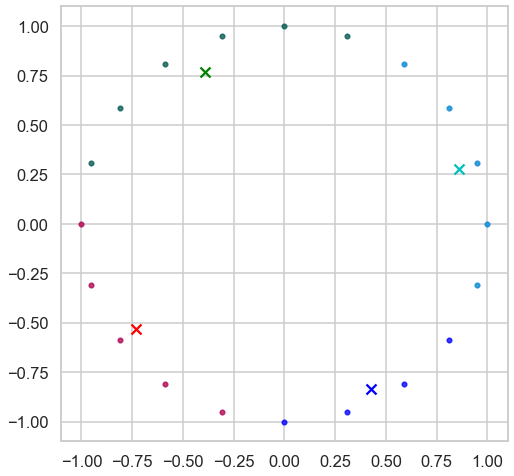

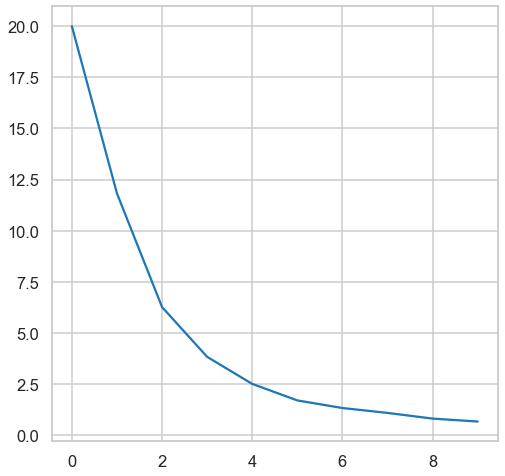

In [16]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X1 = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
display_cluster(X1)
(Clusters_heads , cost, clus_index) = GUC_Kmean(X1,4, 'Ecluidian')
display_cluster(X1 ,km = clus_index,  num_clusters=4)
plt.figure()
plt.plot(calc_elbow(X1))

> #### 2.3. Example 2 : Multi blob Data Gen and display 

In [ ]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X2, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
(Clusters_heads , cost, clus_index) = GUC_Kmean(X2,7, 'Ecluidian')
display_cluster(X2 ,km = clus_index,  num_clusters=7)
plt.figure()
plt.plot(calc_elbow(X2))

In [229]:
X.shape

(1000, 2)

#### 2.3. Example 3 : moons Data Gen and display 

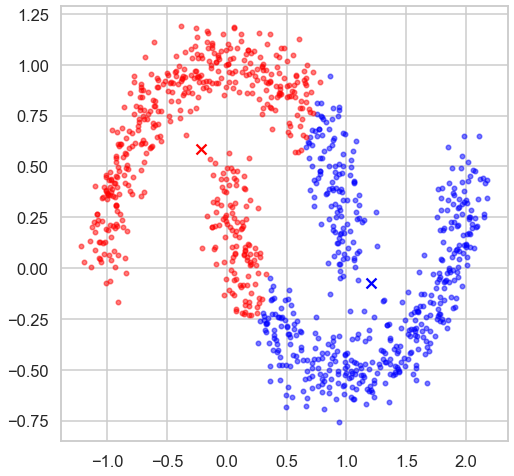

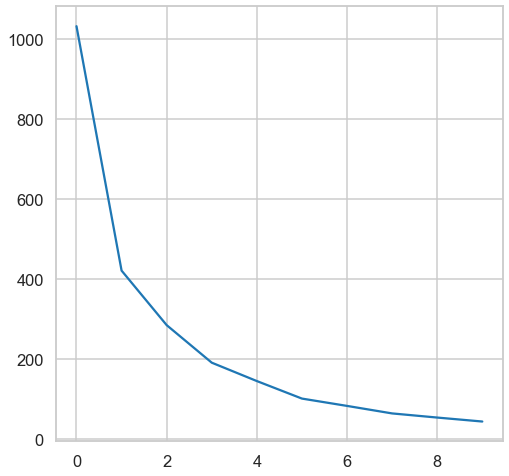

In [49]:
n_samples = 1000
X3, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
(Clusters_heads , cost, clus_index) = GUC_Kmean(X3,2, 'Ecluidian')

display_cluster(X3 ,km = clus_index,  num_clusters=2)
plt.figure()
plt.plot(calc_elbow(X3))

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

In [18]:
c1 = np.zeros((9, 1))
c2 = np.zeros((9, 1))
c3 = np.zeros((9, 1))
costs = [c1, c2, c3]
for i,X in enumerate([X1, X2, X3]):
    
    for n, j in enumerate(range(2,11)):
        (Clusters_heads , cost, clus_index) = GUC_Kmean(X,j, 'Ecluidian')
        costs[i][n] = cost
#         plt.figure()
#         display_cluster(X ,km = clus_index,  num_clusters=j)

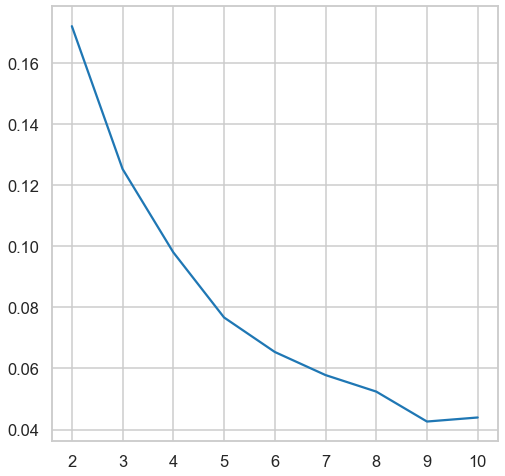

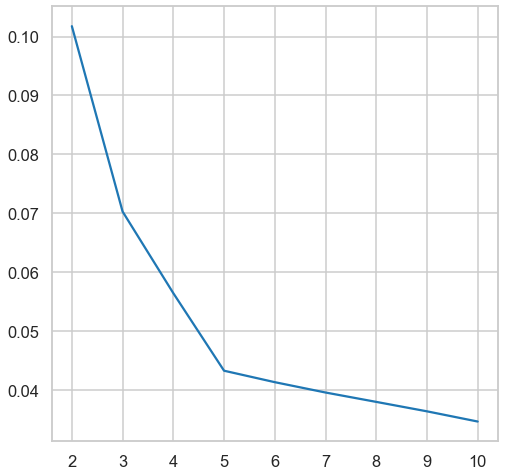

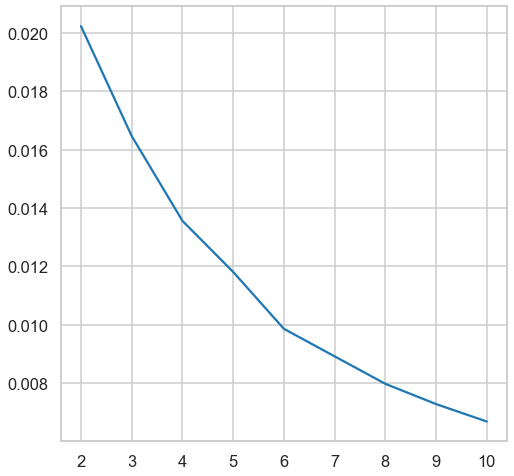

In [19]:
for c in costs:
    plt.figure()
#     plt.plot(c)
    plt.plot(np.arange(2,11), c)

In [20]:
c1 = np.zeros((9, 1))
c2 = np.zeros((9, 1))
c3 = np.zeros((9, 1))
costs = [c1, c2, c3]
for i,X in enumerate([X1, X2, X3]):
    
    for n, j in enumerate(range(2,11)):
        (Clusters_heads , cost, clus_index) = GUC_Kmean(X,j, 'Pearson')
        costs[i][n] = cost
#         plt.figure()
#         display_cluster(X ,km = clus_index,  num_clusters=j)

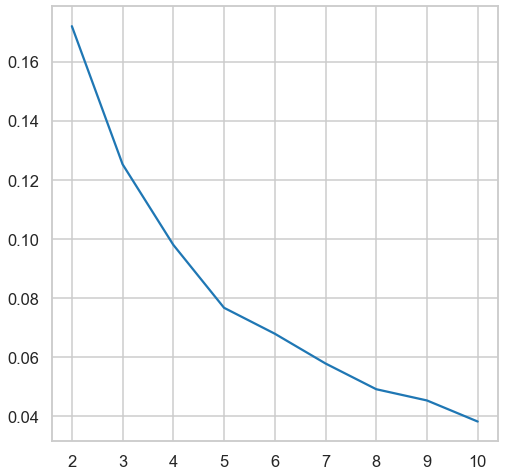

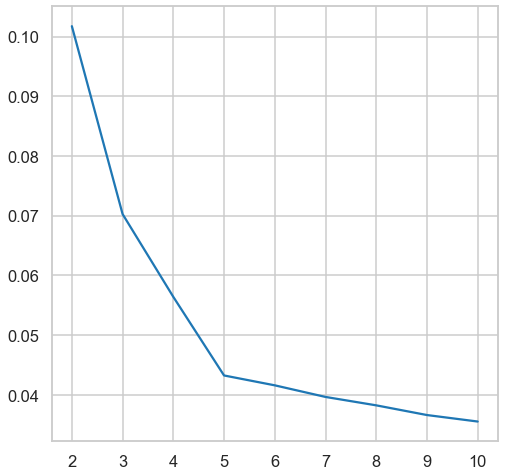

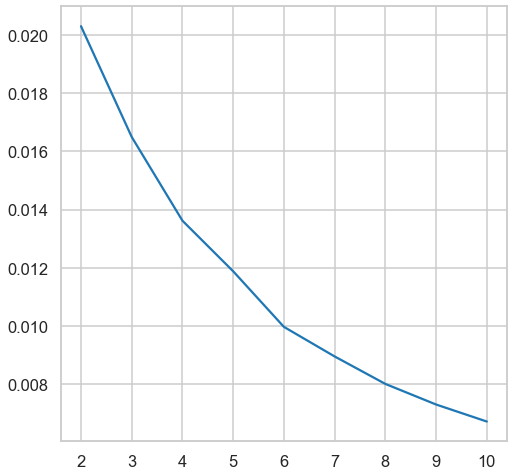

In [21]:
for c in costs:
    plt.figure()
#     plt.plot(c)
    plt.plot(np.arange(2,11), c)

## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

In [22]:
X4 = pd.read_csv('Customer data.csv')
X4 = np.array(X4)
c4 = np.zeros((9, 1))

for n, j in enumerate(range(2,8)):
    (Clusters_heads , cost, clus_index) = GUC_Kmean(X4,j, 'Ecluidian')
    c4[n] = cost
#     plt.figure()
#     display_cluster(X4 ,km = clus_index,  num_clusters=j)

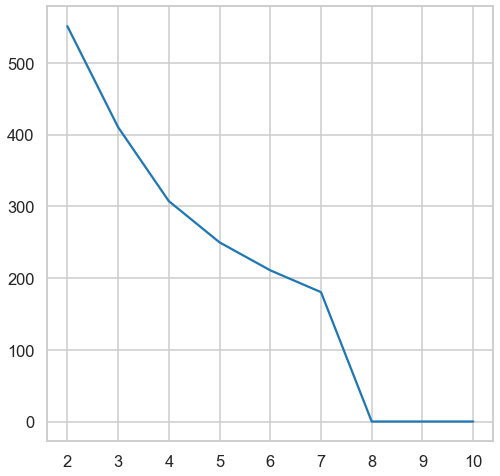

In [23]:
plt.figure()
plt.plot(np.arange(2,11), c4)

In [50]:
X4 = pd.read_csv('Customer data.csv')
X4 = np.array(X4)
c4 = np.zeros((9, 1))

for n, j in enumerate(range(2,8)):
    (Clusters_heads , cost, clus_index) = GUC_Kmean(X4,j, 'Pearson')
    c4[n] = cost
#     plt.figure()
#     display_cluster(X4 ,km = clus_index,  num_clusters=j)

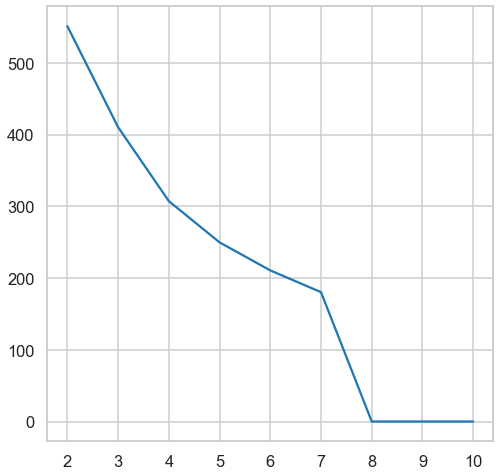

In [51]:
plt.figure()
plt.plot(np.arange(2,11), c4)

In [ ]:
plt.figure()
plt.plot(calc_elbow(X4))